<a href="https://colab.research.google.com/github/ritik-hue/time_series-forecasting/blob/main/prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
pip install prophet

In [9]:
!pip install pystan==2.19.1.1
!pip install convertdate
!pip install lunarcalendar
!pip install holidays==0.10.5
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 82.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
^C
ERROR: Could not find a version that satisfies the requirement holidays==0.10.5 (from versions: 0.1, 0.2, 0.3, 0.3.1, 0.4, 0.4.1, 0.5, 0.6, 0.7, 0.8, 0.8.1, 0.9.3, 0.9.4, 0.9.5, 0.9.6, 0.9.7, 0.9.8, 0.9.9, 0.9.10, 0.9.11, 0.9.12, 0.10.1, 0.10.2, 0.10.3, 0.10.4, 0.10.5.2, 0.11.1, 0.11.2, 0.11.3.1, 0.12, 0.13, 0.14.2, 0.15, 0.16, 0.17, 0.17.2, 0.18, 0.19, 0.20, 0.21, 0.21.13, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.27.1, 0.28)
ERROR: No matching distribution found for holidays==0.10.5
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a

In [29]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df=pd.read_csv('/content/drive/MyDrive/airline_passengers.csv')
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [14]:
df.columns=['ds','y']
df.head()
df.drop(144,axis=0,inplace=True)

In [15]:
df['Date']=pd.to_datetime(df['ds'])

In [16]:
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'here',
 'make_holidays',
 'models',
 'plot']

In [30]:
model=Prophet()

In [31]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf8s_yvgx/afj_riye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf8s_yvgx/j64onrsy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20480', 'data', 'file=/tmp/tmpf8s_yvgx/afj_riye.json', 'init=/tmp/tmpf8s_yvgx/j64onrsy.json', 'output', 'file=/tmp/tmpf8s_yvgx/prophet_modelxvjxr9ac/prophet_model-20230717150307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:03:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:03:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [32]:
future_dates=model.make_future_dataframe(periods=365)

In [33]:
prediction=model.predict(future_dates)

In [34]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.398252,57.660658,114.899724,107.398252,107.398252,-21.393308,-21.393308,-21.393308,-21.393308,-21.393308,-21.393308,0.0,0.0,0.0,86.004944
1,1949-02-01,109.544420,50.582893,106.516847,109.544420,109.544420,-30.060620,-30.060620,-30.060620,-30.060620,-30.060620,-30.060620,0.0,0.0,0.0,79.483800
2,1949-03-01,111.482895,84.228006,141.831370,111.482895,111.482895,-0.469818,-0.469818,-0.469818,-0.469818,-0.469818,-0.469818,0.0,0.0,0.0,111.013077
3,1949-04-01,113.629063,81.282818,138.281327,113.629063,113.629063,-4.917723,-4.917723,-4.917723,-4.917723,-4.917723,-4.917723,0.0,0.0,0.0,108.711340
4,1949-05-01,115.706000,81.555552,141.089428,115.706000,115.706000,-3.618250,-3.618250,-3.618250,-3.618250,-3.618250,-3.618250,0.0,0.0,0.0,112.087749


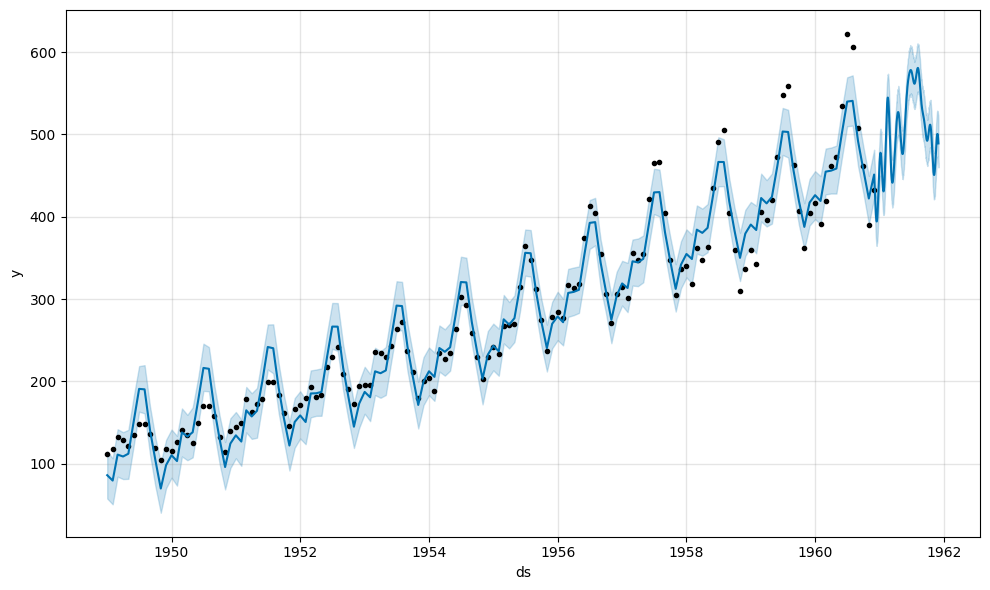

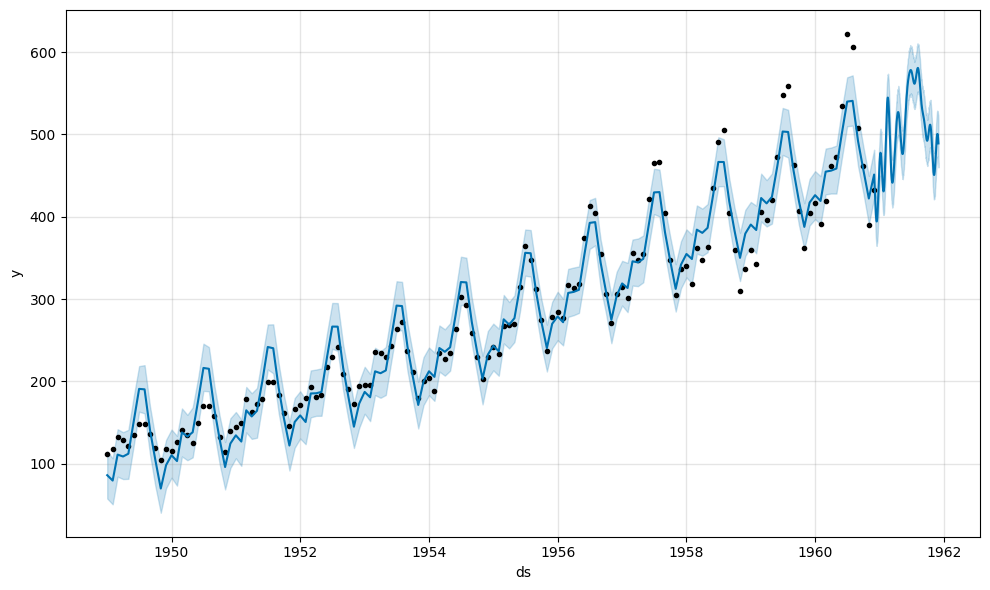

In [35]:
model.plot(prediction)

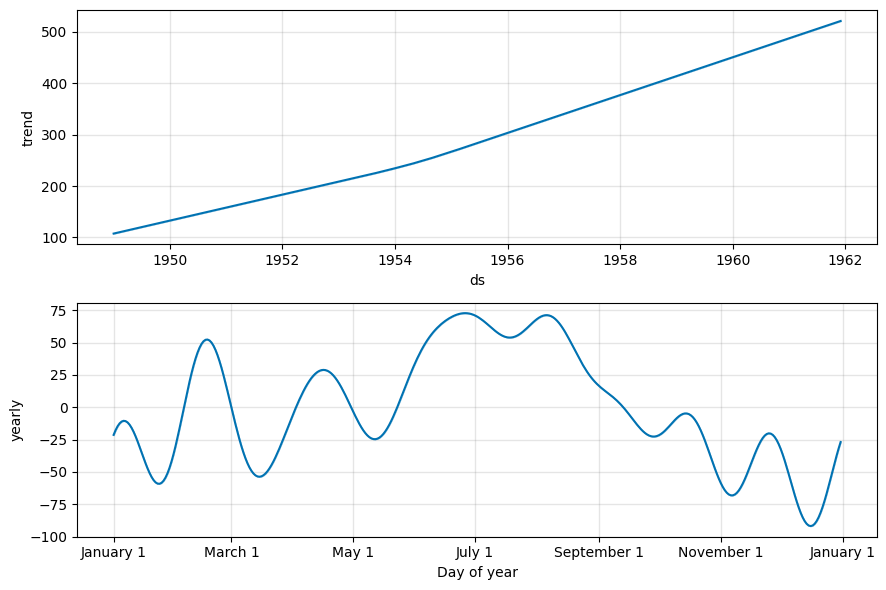

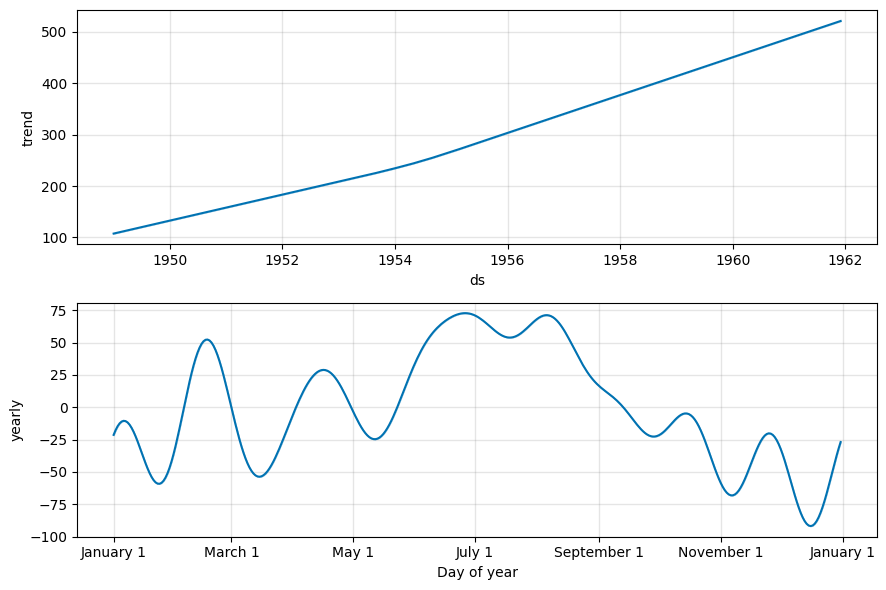

In [36]:
model.plot_components(prediction)

In [37]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:prophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


  0%|          | 0/19 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf8s_yvgx/c4_zacj0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf8s_yvgx/jkpqif74.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6337', 'data', 'file=/tmp/tmpf8s_yvgx/c4_zacj0.json', 'init=/tmp/tmpf8s_yvgx/jkpqif74.json', 'output', 'file=/tmp/tmpf8s_yvgx/prophet_modelznh0xsep/prophet_model-20230717151230.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:12:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:12:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf8s_yvgx/0fkzq2r6.json
DEBUG:cmdstanpy:input tempfil

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,157.432012,157.160104,157.722336,150.0,1951-01-18
1,1951-03-01,170.441687,169.539891,171.413606,178.0,1951-01-18
2,1951-04-01,157.664628,155.775628,159.556329,163.0,1951-01-18
3,1951-05-01,142.712996,139.795026,145.644646,172.0,1951-01-18
4,1951-06-01,178.199284,173.928985,182.454544,178.0,1951-01-18


In [38]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1086.197666,32.957513,25.818695,0.078208,0.074049,0.079267,0.227273
1,42 days,1012.434028,31.818768,25.205349,0.076730,0.074049,0.077447,0.181818
2,46 days,907.411141,30.123266,24.628868,0.078630,0.079621,0.078400,0.136364
3,47 days,1042.767820,32.291916,26.794387,0.081738,0.085523,0.081899,0.136364
4,48 days,1032.336505,32.129994,26.248970,0.079856,0.085523,0.080082,0.181818
